<a href="https://colab.research.google.com/github/iamatul1214/Pytorch/blob/main/Linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## To check the GPU allocated
!nvidia-smi

Tue Mar  8 11:45:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
## We have got Tesla K80 GPU

## Let's create a sample dataset with 4 features and two labels.
### Features- Region, Temperature, Rainfall, humidity
### Label- Production of wheat, production of rice.
## Here we have two labels in same data so we will have two different equations for each label. 
### y1 (Prod. of wheat)=w11*temp + w12*rainfall + w13*humidity + bias1
### y2 (Prod. of Rice)=w21*temp + w22*rainfall + w23*humidity + bias2


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt


In [6]:
## Let's create input data
input=np.array([[32,55,77],
                [82,15,37],
                [72,74,90],
                [34,56,90],
                [67,32,45],
                [91,90,45],], dtype='float32')        ## We can take float64 as well, but in order to save memory we are taking float32
input

array([[32., 55., 77.],
       [82., 15., 37.],
       [72., 74., 90.],
       [34., 56., 90.],
       [67., 32., 45.],
       [91., 90., 45.]], dtype=float32)

In [7]:
## Let's create the target data of label
target=np.array([[32,44],
                 [78,61],
                 [90,71],
                 [74,32],
                 [36,32],
                 [22,69]], dtype='float32')
target

array([[32., 44.],
       [78., 61.],
       [90., 71.],
       [74., 32.],
       [36., 32.],
       [22., 69.]], dtype=float32)

In [8]:
## Now we need to convert input and target to tensors because we are going to work with pytorch. Pytorch and Tensorflow required tensors only because they also work on GPU

input=torch.from_numpy(input)
target=torch.from_numpy(target)

print(input)
print(target)

tensor([[32., 55., 77.],
        [82., 15., 37.],
        [72., 74., 90.],
        [34., 56., 90.],
        [67., 32., 45.],
        [91., 90., 45.]])
tensor([[32., 44.],
        [78., 61.],
        [90., 71.],
        [74., 32.],
        [36., 32.],
        [22., 69.]])


In [9]:
## assigning random weights and biases initially
weights=torch.randn(2,3, requires_grad=True)     ## We need 3 weights for wheat and rice each
bias=torch.randn(2, requires_grad=True)          ## We only need two biases

print(weights)
print(bias)

tensor([[ 1.3984,  1.5159, -1.5664],
        [-1.3794,  0.1947, -0.4998]], requires_grad=True)
tensor([ 1.0370, -1.2773], requires_grad=True)


In [10]:
## Now let's create the matrix multiplication of our model
def model(input):
  return input @ weights.t() + bias       ## input @ weights.t()--> dot product of the input and transpose of weight matrix

In [11]:
prediction=model(input)
print(prediction)

tensor([[   8.5442,  -73.1939],
        [  80.4824, -129.9586],
        [  72.9173, -131.1666],
        [  -7.5070,  -82.2558],
        [  72.7464, -109.9561],
        [ 194.2312, -131.7660]], grad_fn=<AddBackward0>)


In [12]:
from numpy.lib.function_base import diff
## Let's calculate Mean squared error
def MSE(t1,t2):
  difference=t1-t2
  return torch.sum(difference * difference)/ difference.numel()



In [13]:
loss= MSE(prediction, target)
print(loss)

tensor(16924.1074, grad_fn=<DivBackward0>)


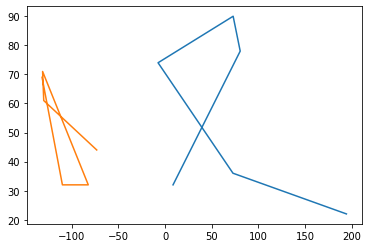

In [14]:
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()

### We observed the loss value and also the graph and found that there are lot of differnces among both of the prediction and actual.

In [15]:
## Let's compute the gradient
loss.backward()

In [25]:
print("Weights and biases before any kind of training\n"+"**"* 30)

print(weights)
print(weights.grad)

print(bias)
print(bias.grad)

Weights and biases before any kind of training
************************************************************
tensor([[ 1.3984,  1.5159, -1.5664],
        [-1.3794,  0.1947, -0.4998]], requires_grad=True)
tensor([[  2264.4714,   1599.2253,   -197.2212],
        [-10938.3789,  -8880.0391,  -9998.3184]])
tensor([ 1.0370, -1.2773], requires_grad=True)
tensor([  14.9024, -161.2162])


In [26]:
## Now let's try to change the value of weights and biases by multiplying it with some learning rate and using optimizer
with torch.no_grad():
  weights -= weights.grad * 1e-5
  bias -= bias.grad * 1e-5

In [28]:
print("Weights and biases After modifying them with multiplication with learning rate but not training\n"+"**"* 50)

print(weights)
print(weights.grad)

print(bias)
print(bias.grad)

Weights and biases After modifying them with multiplication with learning rate but not training
****************************************************************************************************
tensor([[ 1.3757,  1.4999, -1.5645],
        [-1.2700,  0.2835, -0.3999]], requires_grad=True)
tensor([[  2264.4714,   1599.2253,   -197.2212],
        [-10938.3789,  -8880.0391,  -9998.3184]])
tensor([ 1.0368, -1.2757], requires_grad=True)
tensor([  14.9024, -161.2162])


## Now let's try to predict the output and check the loss with the modification of the weight what we did. Note that it was not training and just the modification of weights and biases once,.

In [30]:
prediction=model(input=input)

In [33]:
loss=MSE(prediction,target)
print(f"loss after checking with modfication of weights and biases= {loss}")

loss after checking with modfication of weights and biases= 14034.1923828125


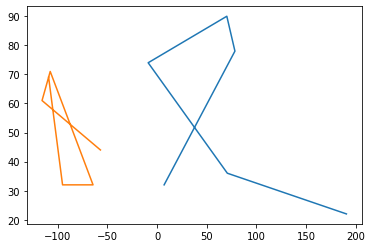

In [34]:
## Let's try to plot the loss now
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()

### We can observe very minute difference now, but we need to train our model in number of epochs which is a hyperparameter to get better result and lesser loss value.

In [46]:
## Let's do training
n=5000
for i in range(n):
  prediction=model(input)
  loss=MSE(prediction,target)
  loss.backward()

  ## Updating weights and biases
  with torch.no_grad():
    weights -= weights.grad * 1e-5   ## W(new)=W(old) - [(dx/dw)*learning rate]
    bias -= bias.grad * 1e-5

    weights.grad.zero_()
    bias.grad.zero_()
  if i % 50 == 0:
    print(f"Epochs: {i}/{n} -> Loss : {loss}")




Epochs: 0/5000 -> Loss : 150.32481384277344
Epochs: 50/5000 -> Loss : 150.322998046875
Epochs: 100/5000 -> Loss : 150.3212432861328
Epochs: 150/5000 -> Loss : 150.31968688964844
Epochs: 200/5000 -> Loss : 150.3180694580078
Epochs: 250/5000 -> Loss : 150.3165740966797
Epochs: 300/5000 -> Loss : 150.3150634765625
Epochs: 350/5000 -> Loss : 150.3136444091797
Epochs: 400/5000 -> Loss : 150.31216430664062
Epochs: 450/5000 -> Loss : 150.31069946289062
Epochs: 500/5000 -> Loss : 150.30926513671875
Epochs: 550/5000 -> Loss : 150.30792236328125
Epochs: 600/5000 -> Loss : 150.30645751953125
Epochs: 650/5000 -> Loss : 150.30506896972656
Epochs: 700/5000 -> Loss : 150.30360412597656
Epochs: 750/5000 -> Loss : 150.30226135253906
Epochs: 800/5000 -> Loss : 150.30079650878906
Epochs: 850/5000 -> Loss : 150.2994384765625
Epochs: 900/5000 -> Loss : 150.2980194091797
Epochs: 950/5000 -> Loss : 150.29664611816406
Epochs: 1000/5000 -> Loss : 150.29525756835938
Epochs: 1050/5000 -> Loss : 150.2938079833984

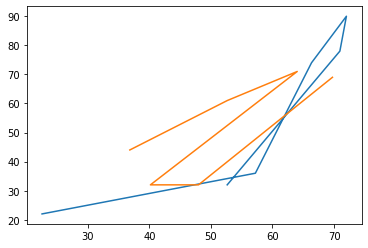

In [47]:
## Let's try to plot the loss now
plt.plot(prediction.detach().numpy(), target.detach().numpy())
plt.show()